# Sonnenfinsternis vom 8. April 2024
The following notebook uses data that has been taken during the solar eclipse 2024 as viewed from upper Sandusky, OH where totality almost lasted for four minutes. As you work through this notebook, you will be calculating, among others, the following quantities:

- The relative size of the Moon and the Sun
- The lunar tangential velocity vector

# Chapter 1 - Understanding the Basics
------------
In this Chapter, we do some basic calculations and review some aspects of celestial kinematics. This is essential to fully understand the consecutive steps where we dive further into the matter and the respective calculations are becoming increasingly sophisticated.

# Task 1 - Plotting One-Dimensional Data Arrays
Let's begin with printing one-dimensional data series. In this example, we plot a circle centered to the coordinate origin (0, 0).

A circular curve can be parameterized with following the parameteric curve:
$$\begin{align*}
x\left(t\right)&=\cos t\\
y\left(t\right)&=\sin t\end{align*}
$$
In this case, we vary the free parameter $t$ in the range $[0, 2\pi[$. $t$ decides the locus of any given point on the circle. The following cell creates a data set which constructs a circle with radius 1.

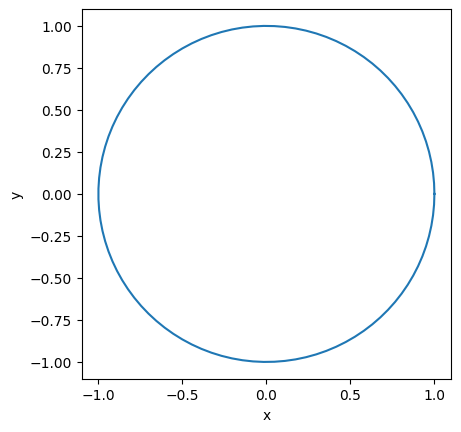

In [10]:
import numpy as np
import matplotlib.pyplot as plt
t_values = np.linspace(0., 2. * np.pi , 100) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

x_values = np.cos(t_values)
y_values = np.sin(t_values)
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect(1)
plt.show()

Kepler's first law states that all planets move on elliptical orbits with the Sun in one of their focal points. We can start drawing an ellipse by modifying the code we have developed for the generation of a circular trajectory. In a strictly mathematical sense, an ellipse can be regarded as a somewhat "squished" circle too. So let us divide the values on the $y$ axis by a constant number (but not zero!). The result will necessarily be an ellipse.

You may play around with different values for the squishing factor, to see its effect on the shape.

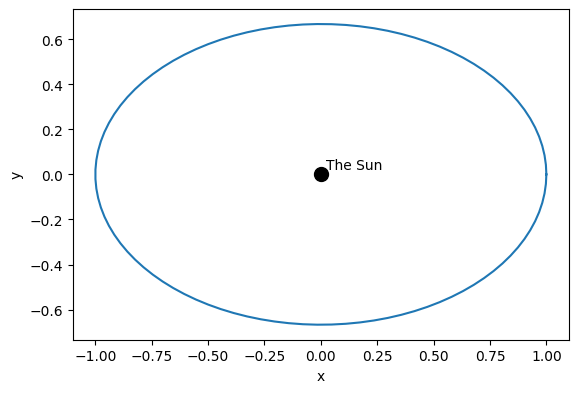

In [17]:
squish_factor = 1.5 # the factor by which the ellipse will be stretched along the y-axis.

import numpy as np
import matplotlib.pyplot as plt
t_values = np.linspace(0., 2. * np.pi , 100) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

x_values = np.cos(t_values)
y_values = np.sin(t_values) / squish_factor
plt.plot(x_values, y_values)

plt.scatter(0,0,s=100, c="k")
plt.text(0.025,0.025, "The Sun")

plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect(1)
plt.show()

The ellipse that we have just constructed is somewhat problematic as the Sun is **not** located in one of the ellipse's focal points. There exists a better representaton with which we can express the elliptic trajectory having one of the two focal points centered to the origin. The free parameter $\varepsilon$ encodes the ellipse's so-called _eccentricity_ and quantifies its "squishyness".

$$
r\left(\varphi\right)=\frac{a}{1+\varepsilon\cos\varphi}
$$

Using the following code snippet, what do the orbits look like for the following eccenticities:

a) $\varepsilon = 0$

b) $0 < \varepsilon < 0.5$

c) $0.8 < \varepsilon < 1$

d) $\varepsilon \lesssim 1$

e) $\varepsilon > 1$

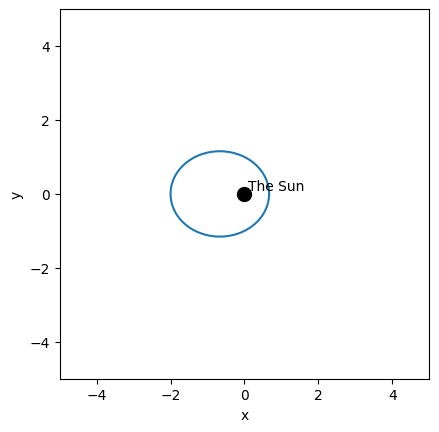

In [33]:
size = 1.
epsilon = 0.5 # the factor by which the ellipse will be stretched along the y-axis.

import numpy as np
import matplotlib.pyplot as plt
phi_values = np.linspace(0., 2. * np.pi , 1000) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

r_values = size / (1. + epsilon * np.cos(phi_values))
x_values = r_values * np.cos(phi_values)
y_values = r_values * np.sin(phi_values)
plt.plot(x_values, y_values)

plt.scatter(0,0,s=100, c="k")
plt.text(0.1,0.1, "The Sun")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect(1)
plt.show()

Levaing the eccenticity constant, what happens if we changed the semi-major axis, a?
In a slightly altered form, the ellipse being generated has a well-defined semi-major axis:
$$
r\left(\varphi\right)=\frac{a\left(1-\varepsilon^{2}\right)}{1+\varepsilon\cos\varphi}
$$

How does the trajectory change with varying values for $a$?

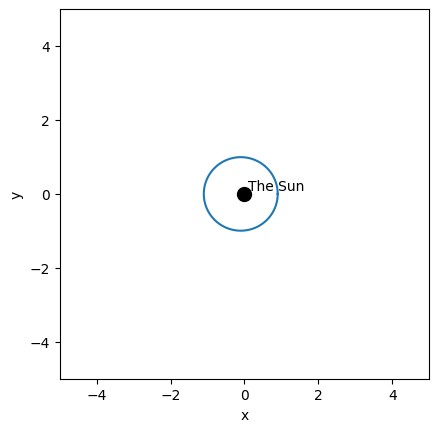

In [37]:
a = 1.
epsilon = 0.1 # the factor by which the ellipse will be stretched along the y-axis.

import numpy as np
import matplotlib.pyplot as plt
phi_values = np.linspace(0., 2. * np.pi , 1000) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

r_values = a * (1. - epsilon**2) / (1. + epsilon * np.cos(phi_values))
x_values = r_values * np.cos(phi_values)
y_values = r_values * np.sin(phi_values)
plt.plot(x_values, y_values)

plt.scatter(0,0,s=100, c="k")
plt.text(0.1,0.1, "The Sun")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect(1)
plt.show()

The following cell defines a function with which the previous steps are wrapped into a more concise function. Given a specific paratemter tuple of $a$ and $\varepsilon$, it generate the data points lying on the corresponding orbit.

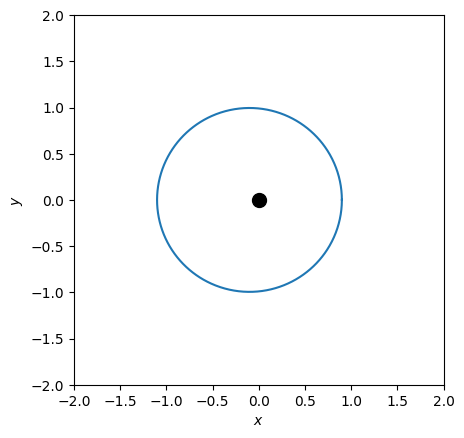

In [48]:
def ellipse(a=1., epsilon=0., rotation=0., center=[0, 0], n_points=1000):
    import numpy as np
    import matplotlib.pyplot as plt
    phi_values = np.linspace(0., 2. * np.pi , n_points) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

    r_values = a * (1. - epsilon**2) / (1. + epsilon * np.cos(phi_values))
    x_values = r_values * np.cos(phi_values - rotation) + center[0]
    y_values = r_values * np.sin(phi_values - rotation) + center[1]

    return x_values, y_values

# Example function call
a = 1.
epsilon = 0.1
x_data, y_data = ellipse(a, epsilon)

plt.plot(x_data, y_data)
plt.scatter(0,0,s=100, c="k")
plt.gca().set_aspect(1)
plt.xlim(-2.*a, 2.*a)
plt.ylim(-2.*a, 2.*a)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Building the Solar System
Knowing how we construct a planetary orbit now, we can go a step further and start generating our solar system. Go to https://en.wikipedia.org/wiki/List_of_gravitationally_rounded_objects_of_the_Solar_System and note down the following numbers for all planets:

- Mean distance from the Sun in AU (astronomical units), which we have gotten to know as the semi-major axis $a$ previously
- Eccentricity (which we know as the parameter $\varepsilon$ earlier)



With those numbers in place, complete the following code snippet to generate a miniature solar system.

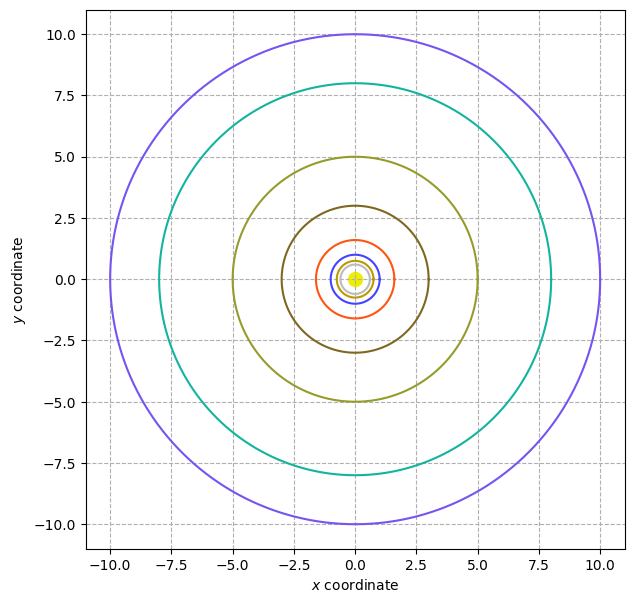

In [67]:
fig, ax = plt.subplots(figsize=(12,7))

ax.scatter(0,0, s=100, c="#eeee00") # The Sun

## Mercury ##
#############
a       = 0.6 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#bbbbbb")

##  Venus  ##
#############
a       = 0.75 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#bb9900")

##  Earth  ##
#############
a       = 1.0 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#4444ff")

##  Mars   ##
#############
a       = 1.6 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#ff5511")

## Jupiter ##
#############
a       = 3. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#7e6821")

## Saturn  ##
#############
a       = 5. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#959c2c")

## Uranus  ##
#############
a       = 8. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#13b49f")

## Neptune ##
#############
a       = 10. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#7654f0")

################
ax.set_aspect(1)
ax.grid(ls="--")
ax.set_xlabel("$x$ coordinate")
ax.set_ylabel("$y$ coordinate")
plt.show()

If made it to this point, you have now created a mock of our solar system in first-order approximation. In reality, things are a tad more complicated as it actually takes 6 parameters to fully describe the shape of a planetary orbit in three-dimensional space. Fully reconstructing our solar system taking into acount all of these nitty gritty details is, however, out of the scope of this notebook.


Let us now use the $\mathtt{ellipse}$ function once more to explore the vastly different scales in our solar system. Gaining some sort of intuition is important as it helps us understanding the phenomena eventually leading to a solar eclipse like the one on April 8th 2024.

During a solar eclipse the Moon's shadow cone intersects with planet Earth creating a more or less circular shadow in its surface. We can not expect a solar eclipse every time we have new moon. This is due to the fact that the lunar orbit is vertically inclined by about _5 deg_. As a consequence, here and there, the Earth misses the lunar shadow and not solar eclipse is visible on our planet. To get a felling about the odds of this happening let us first plot the lunar orbit in correct scaling to the Earth's cross section.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rawpy
from rawkit.raw import Raw
from matplotlib.patches import Circle
import PIL.Image
from tqdm import tqdm

def convert_raw_image(fname):
    """Display an rgb raw image."""
    raw_data = rawpy.imread(fname)
    rgb = raw_data.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16) / (2**16 - 1)
    return rgb

def find_center(data, channel=1):
    """Find the image's center of mass."""
    y_center = np.average(np.arange(data.shape[1]), weights=np.sum(data[:, :, channel], axis=0))
    x_center = np.average(np.arange(data.shape[0]), weights=np.sum(data[:, :, channel], axis=1))

    return (x_center, y_center)

def regress_to_center(data, maxiter=100, init=None, stepsize=[2,2,2]): # initial_parameters [x, y, radius]

    total_integral = data.sum()
    total_area = data.size
    xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
    
    def loss_func(x, y, r):
        mask = (xx - x)**2 + (yy - y)**2 <= r**2
        integral = np.sum(data * mask)
        area = np.pi * r**2
        
        #return area / integral - (total_area - area) / (total_integral - integral)
        return area/total_area - integral/total_integral

    if init == None:
        all_x    = [data.shape[0]      / 2.]
        all_y    = [data.shape[1]      / 2.]
        all_r    = [np.min(data.shape) / 2.]
        all_loss = [loss_func(all_x[-1], all_y[-1], all_r[-1])]
    else:
        all_x    = [init[0]]
        all_y    = [init[1]]
        all_r    = [init[2]]
        all_loss = [loss_func(all_x[-1], all_y[-1], all_r[-1])]
        
    for i in tqdm(np.arange(maxiter)):
        x = all_x[-1] + np.random.normal(0, stepsize[0])
        y = all_y[-1] + np.random.normal(0, stepsize[1])
        r = all_r[-1] + np.random.normal(0, stepsize[2])
        loss = loss_func(x, y, r)
        if all_loss[-1] >= loss:
            all_x.append(x)
            all_y.append(y)
            all_r.append(r)
            all_loss.append(loss)

    return all_x, all_y, all_r, all_loss

In [9]:
image_data = convert_raw_image("data/IMG_1369.CR2")
center_coordinates = find_center(image_data >= 0.1)
masked_data = image_data[:, :, 1] >= 1./20.
all_x, all_y, all_r, all_loss = regress_to_center(masked_data, maxiter=200, init=[center_coordinates[1], center_coordinates[0], 482.], stepsize=[10., 10., 0.1])

print(all_x, all_y, all_r, all_loss)

100%|█████████████████████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.08it/s]

[2070.972617885396, 2088.0439666515085, 2083.6525949771058, 2079.5629402620357, 2076.022031654111, 2078.196876582685, 2079.0509344316347, 2078.876673820879] [2827.699518785999, 2842.797198292702, 2847.037105726263, 2844.0907750051892, 2845.2390725270175, 2851.022966113475, 2850.673952131617, 2850.01027586273] [482.0, 482.0905771747507, 482.26900472559845, 482.2459579861886, 482.3731611626882, 482.5796161815964, 482.6035993260198, 482.7267978001049] [-0.9533962252171779, -0.9589418512115034, -0.9646345132860317, -0.9672005799797684, -0.9676920874643832, -0.9695538496101115, -0.9695798434059031, -0.9697702893223046]


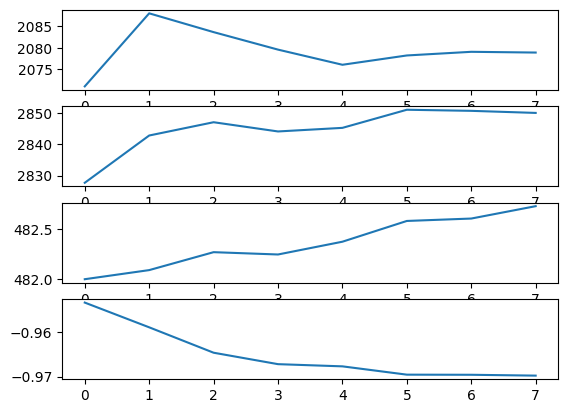

In [10]:
fig, axs = plt.subplots(nrows=4)
axs[0].plot(all_x)
axs[1].plot(all_y)
axs[2].plot(all_r)
axs[3].plot(all_loss)
plt.show()

# Show the pictures

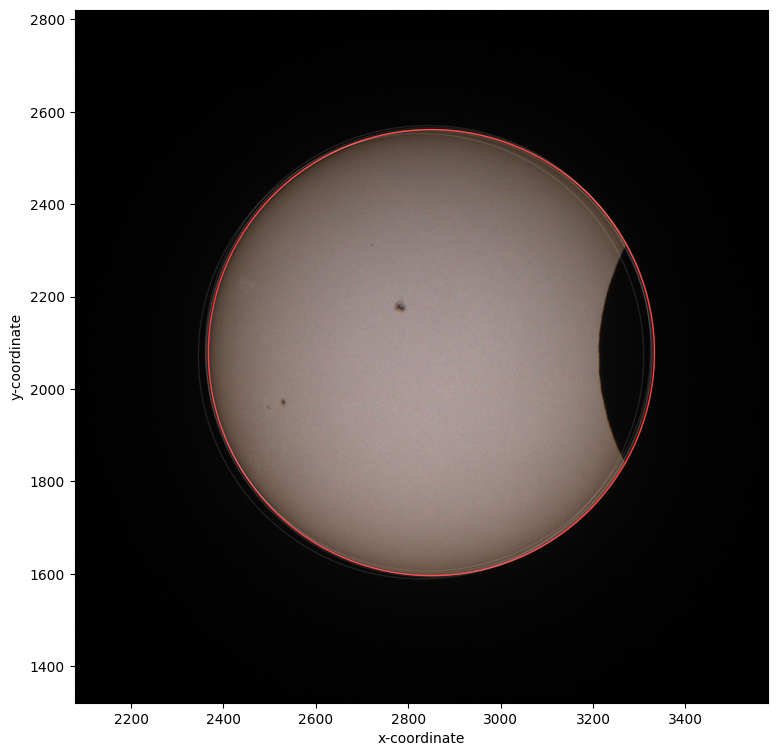

AttributeError: 'TiffImageFile' object has no attribute '_getexif'

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
ax.imshow(np.transpose(image_data, axes=[1,0,2]) / image_data.max())
center_coordinates = find_center(image_data >= 0.1)
ax.add_patch(Circle(
    (all_y[-1], all_x[-1]),
    radius=all_r[-1],
    fc="None",
    ec="red"
))

for x, y, r in zip(all_x, all_y, all_r):
    ax.add_patch(Circle((y, x), r, fc="None", ec="white", alpha=0.1))

ax.set_xlabel("x-coordinate")
ax.set_ylabel("y-coordinate")

ax.set_xlim(center_coordinates[0] - 750, center_coordinates[0] + 750)
ax.set_ylim(center_coordinates[1] - 750, center_coordinates[1] + 750)
plt.show()